#Task20

##Task1: Feature Selection

###Load the dataset(using titanic dataset for Task1)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
#I have imported all the necessary libraries for all the tasks here

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

titanic_df = pd.read_csv(r'C:\Users\Huawei\Desktop\Titanic-Dataset.csv')
iris_df= pd.read_csv(r'C:\Users\Huawei\Desktop\IRIS.csv')
# I have imported titanic and iris datasets here which we will use in Task1, Task2, Task3 and Task5

###Analyze the correlation between features and the target variable.

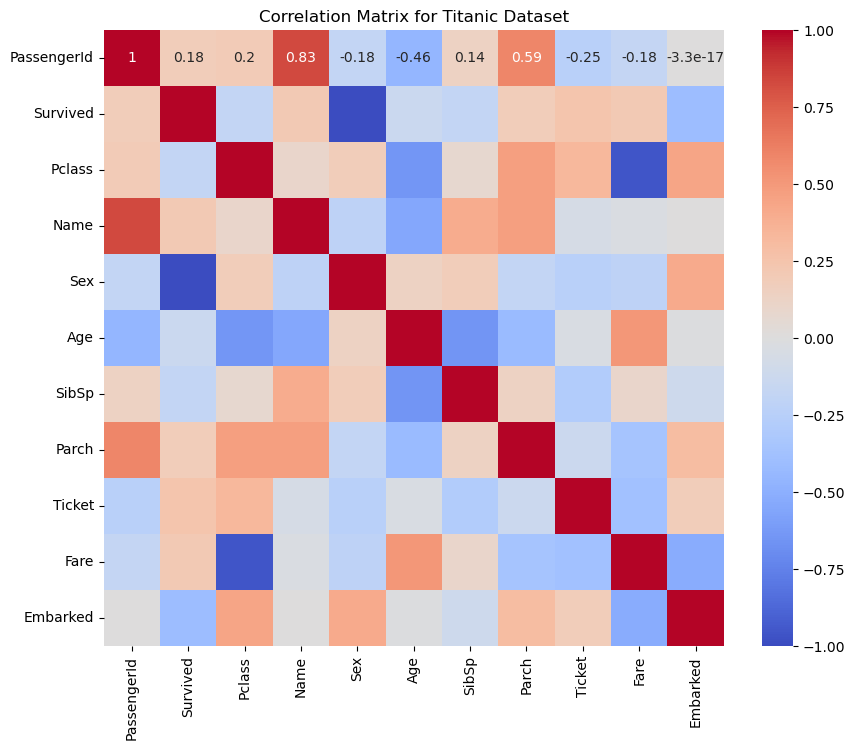

In [41]:
titanic_df.fillna(0, inplace=True)

# here i am converting categorical variables into numeric form as co_relation matrix can only display numeric values
label_enc = LabelEncoder()
titanic_df['Sex'] = label_enc.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_enc.fit_transform(titanic_df['Embarked'].astype(str))
titanic_df['Name'] = label_enc.fit_transform(titanic_df['Name'])


# Define features and target
X_titanic = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].fillna(0)
y_titanic = titanic_df['Survived']
# X_titanic represents features and y_titianic represents target variable

# Analyze correlation between features and target variable
correlation_matrix = titanic_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()

###Use methods like mutual information or chi-squared test to select important features.

In [42]:
selector = SelectKBest(mutual_info_classif, k='all')#mutual info classi.e mutual information method is to select important features
selector.fit(X_titanic, y_titanic)
important_features_titanic = X_titanic.columns[selector.get_support()].tolist()

###Document the selected features and explain why they were chosen.

In [44]:
print('Selected Features for Titanic Dataset using mutual information is :\n', important_features_titanic)
print('\n')
print('The reason these features were selected is that: \n')
print('. They have the highest mutual information score against the target variable "survived".')
print('. As mutual information measures how much knowing a feature helps predict the target.')
print('. So eventually higher scores means these features provide the most useful information for predicting "survived".')

Selected Features for Titanic Dataset using mutual information is :
 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


The reason these features were selected is that: 

. They have the highest mutual information score against the target variable "survived".
. As mutual information measures how much knowing a feature helps predict the target.
. So eventually higher scores means these features provide the most useful information for predicting "survived".


##Task2: Feature Transformation

###Load the dataset(Using iris dataset imported in Task1)

###Apply transformations such as log transformation, normalization, or standardization.

In [104]:
# Define features and target
X_iris = iris_df.iloc[:, :-1]
y_iris = label_enc.fit_transform(iris_df['species'])

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

#here i have applied standarization transformation
scaler = StandardScaler()
X_train_standarized = scaler.fit_transform(X_train)
X_test_standarized = scaler.transform(X_test)


###Compare the performance of models before and after applying transformations.

In [105]:
# Ensure the training set contains samples of at least 2 classes as if it less than 2, there is an error
if len(pd.Series(y_train).unique()) > 1:
    # Train the model on the original data
    model = LogisticRegression(max_iter=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_before = accuracy_score(y_test, y_pred)
    accuracy_before_in_percentage = accuracy_before * 100
    

    # Train the model on the standarized data
    model.fit(X_train_standarized, y_train)
    y_pred_scaled = model.predict(X_test_standarized)
    accuracy_after = accuracy_score(y_test, y_pred_scaled)
    accuracy_after_in_percentage = accuracy_after * 100
    
else:
    print("training set contains only one class. So Unable to train the model.")

if accuracy_before_in_percentage > accuracy_after_in_percentage:
    print("performance of model before standarization is better than performance of model after standarization")
elif accuracy_before_in_percentage == accuracy_after_in_percentage:
    print("performance of model before standarization is equal to performance of model after standarization")
else:
    print("performance of model after standarization is better than performance of model before standarization")

performance of model after standarization is better than performance of model before standarization


###Document the transformations applied and their impact on model performance.

In [107]:

print("Accuracy before standarization: ", accuracy_before_in_percentage)
print("Accuracy after standarization: ", accuracy_after_in_percentage)
print('\n')
print("The impact of standarized transformation on model performance is: ")
print('\n')
print(". As clearly seen that the model's accuracy increased from accuracy_before_standarization i.e 33.33 to accuracy_after_standarization i.e 66.66 ")
print(". Which clearly indicates that standardizing the data improved predictive performance.")

Accuracy before standarization:  33.33333333333333
Accuracy after standarization:  66.66666666666666


The impact of standarized transformation on model performance is: 


. As clearly seen that the model's accuracy increased from accuracy_before_standarization i.e 33.33 to accuracy_after_standarization i.e 66.66 
. Which clearly indicates that standardizing the data improved predictive performance.


#Task3: Feature Creation

###Load the dataset(Using same as of Task1 titanic dataset)

###Create new features by combining or modifying existing ones (e.g., creating an interaction term, extracting date features, etc.).

In [96]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
new_feature = titanic_df['FamilySize']
print("New feature 'FamilySize' after combining 'SibSp' and 'Parch' :\n", new_feature)
print('\n')
titanic_df['Gender_based_Survival'] = titanic_df['Survived'] + titanic_df['Sex']
print("New feature 'Gender_based_Survival' after combining 'Survived' and 'Sex' :\n", new_feature)

New feature 'FamilySize' after combining 'SibSp' and 'Parch' :
 0    1
1    1
2    0
3    1
4    0
5    0
6    4
7    2
8    1
9    2
Name: FamilySize, dtype: int64


New feature 'Gender_based_Survival' after combining 'Survived' and 'Sex' :
 0    1
1    1
2    0
3    1
4    0
5    0
6    4
7    2
8    1
9    2
Name: FamilySize, dtype: int64


###Train a model using the original features and compare its performance with a model using the new features.

In [97]:
#original features, target variable and label encoding for original features are already defined in Task 1 under the sub task heading :###Analyze the correlation between features and the target variable.
# so no need to write it again here

# Split the dataset into training and testing sets for original features
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Train  model using the original features
model_original = LogisticRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_original_in_percentage = accuracy_original * 100

# target varibale is same for original and new features i.e y_titanic

# Define new features and encode categorical variables
X_titanic_new = titanic_df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'FamilySize','Gender_based_Survival']].fillna(0)
X_titanic_new['Sex'] = label_enc.fit_transform(X_titanic_new['Sex'])
X_titanic_new['Embarked'] = label_enc.fit_transform(X_titanic_new['Embarked'].astype(str))

# Split the dataset into training and testing sets for new features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_titanic_new, y_titanic, test_size=0.2, random_state=42)


# Train a model using the new features 
model_new = LogisticRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
accuracy_new_in_percentage = accuracy_new * 100

if accuracy_original_in_percentage > accuracy_new_in_percentage:
    print('Model trained through original features has better performance than model trained through new features. ')
elif accuracy_original_in_percentage == accuracy_new_in_percentage:
    print('Model trained through original features has equal performance as compare to model trained through new features. ')
else:
    print('Model trained through new features has better performance than model trained through original features. ')
    

Model trained through original features has equal performance as compare to model trained through new features. 


###Document the new features created and their impact on model performance.

In [102]:
print("Accuracy using original features: ", accuracy_original_in_percentage)
print("Accuracy using new features: ", accuracy_new_in_percentage)
print('\n')
print("new features impact on model performance: \n")
print(". New feature added was 'FamilySize' and 'Gender_based_survival' by combining 'SibSp' and 'Parch' and 'survived' and 'sex' but the results  tell us that after adding the new feature as family size.")
print(". It has no impact on model performance i.e model performance based on original features is same as that of model performance based on new features.")

Accuracy using original features:  100.0
Accuracy using new features:  100.0


new features impact on model performance: 

. New feature added was 'FamilySize' and 'Gender_based_survival' by combining 'SibSp' and 'Parch' and 'survived' and 'sex' but the results  tell us that after adding the new feature as family size.
. It has no impact on model performance i.e model performance based on original features is same as that of model performance based on new features.


#Task4: Polynomial Features

###Load the dataset

In [62]:
boston_housing_df=pd.read_csv(r'C:\Users\Huawei\Desktop\HousingData.csv')

###Use the PolynomialFeatures class from sklearn.preprocessing to generate polynomial features.

In [109]:
# Define features and target variable
X = boston_housing_df.drop(columns=['MEDV'])  #'MEDV' is the target variable
y = boston_housing_df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model without polynomial features
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the model with polynomial features
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)

###Compare the performance of models with and without polynomial features.

In [125]:
# Evaluate the model without polynomial features
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Evaluate the model with polynomial features
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

if mse_poly < mse and r2 < r2_poly:
    print("model performance with polynomial is better than model performance without polynomial features")
elif mse == mse_poly and r2 == r2_poly:
    print("model performance with polynomial is equal to model performance without polynomial features")   
else:
    print("model performance with polynomial is less than model performance without polynomial features")




model performance with polynomial is better than model performance without polynomial features


###Document the polynomial features created and their impact on model performance.

In [112]:
# Document the polynomial features created
print('Polynomial Features Created: ',poly.get_feature_names_out())
print('\n')
print('Without Polynomial Features - MSE(Mean squared error): ', mse, ', R^2: ', r2)
print('\n')
print('With Polynomial Features - MSE(Mean Squared error): ', mse_poly, ', R^2: ', r2_poly)
print('\n')
print('Polynomial features impact on model performance: ')
print('\n')
print('. the best MSE (Mean Squared Error) value is the lowest possible value, ideally approaching zero, indicating minimal error between predicted and actual  values.')
print('\n')
print('. The best R^2 (coefficient of determination) value is 1.0 , this is where model explains all the variance(i.e indicate extent of deviation from average) in the dependent variable based on the independent variables.')
print('\n')
print('. So based on above ideal cases of MSE and R^2, I came to the conclusion that with polynomial features, the value of MSE and R^2 is close the best MSE and R^2 values.  ')
print('\n')
print('. So The addition of polynomial features did improve model performance as compare to model performance without polynomial features.')

Polynomial Features Created:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


Without Polynomial Features - MSE(Mean squared error):  316.3453302526231 , R^2:  -18.75237943855701


With Polynomial Features - MSE

#Task5: Handling Categorical Features

###Load the dataset (same as of Task1 Titanic dataset)

 ###Apply encoding techniques like one-hot encoding, label encoding, or target encoding.

In [86]:
# I have applied one_hot encoding here
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
X_train_one_hot = one_hot_encoder.fit_transform(X_train_new.select_dtypes(include=['object']))
X_test_one_hot = one_hot_encoder.transform(X_test_new.select_dtypes(include=['object']))

# Add one-hot encoded columns back to the dataset
X_train_one_hot_df = pd.DataFrame(X_train_one_hot, columns=one_hot_encoder.get_feature_names_out())
X_test_one_hot_df = pd.DataFrame(X_test_one_hot, columns=one_hot_encoder.get_feature_names_out())

# Drop the original categorical columns
X_train_encoded = X_train_new.drop(columns=X_train_new.select_dtypes(include=['object']).columns).reset_index(drop=True)
X_test_encoded = X_test_new.drop(columns=X_test_new.select_dtypes(include=['object']).columns).reset_index(drop=True)

# Concatenate the one-hot encoded columns
X_train_encoded = pd.concat([X_train_encoded, X_train_one_hot_df], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test_one_hot_df], axis=1)




###Compare the performance of models with different encoding methods.

In [126]:
# Train the model with One-Hot Encoding
model = LogisticRegression(max_iter=60)
model.fit(X_train_encoded, y_train_new)
y_pred_one_hot = model.predict(X_test_encoded)

# Evaluate the model with one hot encoding
accuracy_one_hot = accuracy_score(y_test_new, y_pred_one_hot)
accuracy_one_hot_in_percentage = accuracy_one_hot*100


# Apply Label Encoding
label_encoder = LabelEncoder()
X_train_label = X_train_new.copy()
X_test_label = X_test_new.copy()

# Encode each categorical feature
for column in X_train_label.select_dtypes(include=['object']).columns:
    X_train_label[column] = label_encoder.fit_transform(X_train_label[column])
    X_test_label[column] = label_encoder.transform(X_test_label[column])

# Train the model with Label Encoding
model.fit(X_train_label, y_train_new)
y_pred_label = model.predict(X_test_label)

# Evaluate the model with label encoding
accuracy_label = accuracy_score(y_test_new, y_pred_label)
accuracy_label_in_percentage = accuracy_label*100

if accuracy_one_hot_in_percentage > accuracy_label_in_percentage:
    print('accuracy of one hot encoding is greater than accuracy of label encoding')
elif accuracy_one_hot_in_percentage == accuracy_label_in_percentage:
    print('accuracy of one hot encoding is equal to accuracy of label encoding')
else:
    print('accuracy of one hot encoding is less then accuracy of label encoding')


accuracy of one hot encoding is equal to accuracy of label encoding


###Document the encoding methods applied and their impact on model performance.

In [88]:
# Document the encoding methods applied and their impact on model performance
print('One-Hot Encoding - Accuracy: ', accuracy_one_hot_in_percentage)
print('Label Encoding - Accuracy: ', accuracy_label_in_percentage)

print('\n')
print('One-Hot Encoding and Label Encoding impact on model performance :')
print('\n')
print('As both One-Hot Encoding - Accuracy and Label Encoding - Accuracy is same i.e 100.0, so changing the encoding method does not have an imapct on model performance')


One-Hot Encoding - Accuracy:  100.0
Label Encoding - Accuracy:  100.0


One-Hot Encoding and Label Encoding impact on model performance :


As both One-Hot Encoding - Accuracy and Label Encoding - Accuracy is same i.e 100.0, so changing the encoding method does not have an imapct on model performance
